LeNet is a convolutional neural network structure proposed by Yann LeCun et al. in 1989. In general, LeNet refers to LeNet-5 and is a simple convolutional neural network. Convolutional neural networks are a kind of feed-forward neural network whose artificial neurons can respond to a part of the surrounding cells in the coverage range and perform well in large-scale image processing.


LeNet-5 was one of the earliest convolutional neural networks and promoted the development of deep learning. Since 1988, after years of research and many successful iterations, the pioneering work has been named LeNet-5.In 1989, Yann LeCun et al. at Bell Labs first applied the backpropagation algorithm to practical applications, and believed that the ability to learn network generalization could be greatly enhanced by providing constraints from the task's domain. He combined a convolutional neural network trained by backpropagation algorithms to read handwritten numbers and successfully applied it in identifying handwritten zip code numbers provided by the US Postal Service. This was the prototype of what later came to be called LeNet.[1] In the same year, LeCun described a small handwritten digit recognition problem in another paper, and showed that even though the problem is linearly separable, single-layer networks exhibited poor generalization capabilities.

In [ ]:
#importing dependencies
import tensorflow as tf
import pandas as pd
import seaborn as sns  # to plot images and statical version of data
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import PIL
import pickle
import tensorflow as tf
tf.keras.layers.LayerNormalization

keras.layers.normalization.layer_normalization.LayerNormalization

In [ ]:
tf.__version__

'2.8.2'

CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:

Airplanes Cars Birds Cats Deer Dogs Frogs Horses Ships Trucks The dataset stands for the Canadian Institute For Advanced Research (CIFAR)

CIFAR-10 is widely used for machine learning and computer vision applications.

The dataset consists of 60,000 32x32 color images and 6,000 images of each class.

Images have low resolution (32x32)

Importing Libraries, dataset.

In [ ]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10

In [ ]:
# loading the dataset

(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

After that, I visualised my data.

array([2], dtype=uint8)

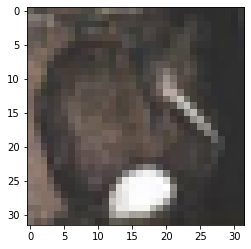

In [ ]:
i = random.randint(1, 50000)
plt.imshow(X_train[i]) # showing the image
y_train[i] # showing the label of that images

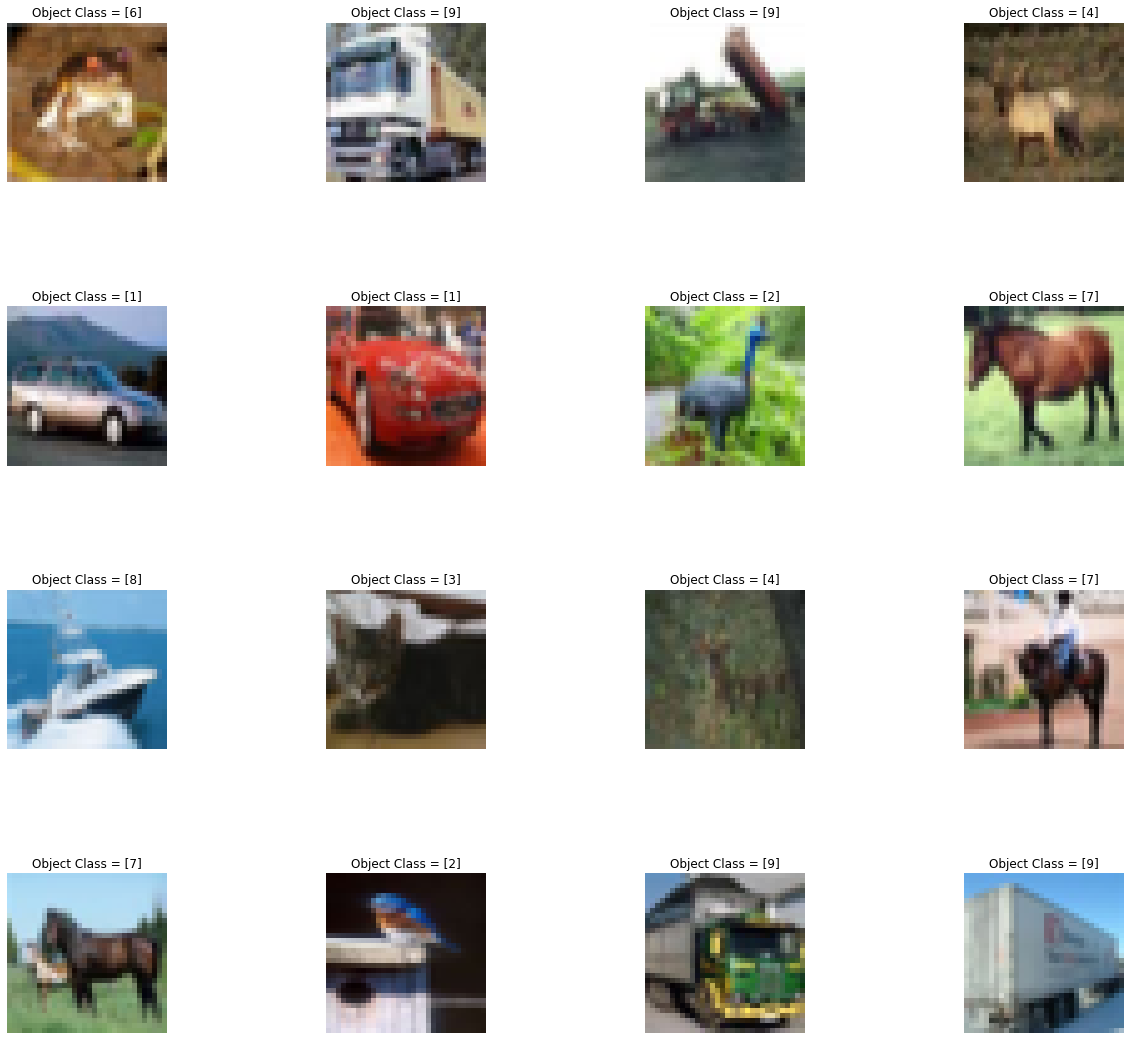

In [ ]:
L = 4
W = 4
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_train[i])
    axes[i].set_title("Object Class = {}".format(y_train[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)



Data Preparation-i Coverted the images to gray image (32X32X1) from colored format (32X3X3) after observing their shapes via visualisation in the cells above....

In [ ]:
2# Coverting the images to gray image (32X32X1) from colored format (32X3X3)
X_train_gray = np.sum(X_train/3, axis=3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims = True)

In [ ]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128

In [ ]:
X_train_gray_norm.shape

(50000, 32, 32, 1)

General architecture -The input layer L− acts like the retina receiving images of characters that are centered and size-normalized (otherwise, some images may not fit in the input layer). The next layer L−1 is composed of several features maps, which have the same role that the Neocognitron simple-cells: to extract simple features as oriented edges, corners, end-points, etc. In practice, a feature map is a squared matrix of identical weights. Weights within a feature map need to be identical so they can detect the same local feature in the input image. Weights between feature maps are different so they can detect different local features. Each unit in a feature map has a receptive field. This is, a small n×n sub-area or “neighborhood” of the input image that can be “perceived” by a unit in the feature map.
Feature maps and receptive fields sound complicated. Here is a metaphor that may be helpful: imagine that you have 6 flashlights with a square beam of light. Each flashlight has the special quality of revealing certain “features” of images drawn with invisible ink, like corners or oriented edges. Also, imagine that you have a set of images that were drawn with invisible ink. Now, you need your special flashlights to reveal the hidden character in the image. What you need to do is to carefully illuminate each section of the invisible image, from right to left and top to bottom, with each of your 6 flashlights. Once you finish the process, you should be able to put together all the little “features” revealed by each flashlight to compose the full image shape. Here, the square beam of light sliding over each pixel represents the aforementioned receptive field, and each flashlight represents a feature map.
A simplified representation of the feature detection process (assuming that each time a pixel in the input image match a pixel in the feature detector we add a value of 1, although in practice it can be any real-valued scalar). In this example we use a stride of 1, meaning that we shift the receptive field by 1 pixel (to the right or down) for each cell in the feature map.
The process of sliding over the image with the receptive field (sometimes called kernels) of feature maps equals to a mathematical operation called convolution (technically, equals to cross-correlation, more about this later), hence the name convolutional network. The full convolution operation involves repeating the process in Figure 4 for each feature map. If you are wondering how do you come up with appropriated features detectors, the answer is that you don’t need to: the feature maps weights are learned in the training process.
The pooling operation: subsampling
Once the convolution operation is done, what we have learned is whether a feature is present in the image or not. Now, knowing that a collection of features is present in an image won’t tell us, by itself, which image they correspond to. What we need to know is their approximate position relative to each other. For instance, if we know that we have a “curvy horizontal line” at the center-bottom, a “curvy vertical line” at the middle-right, a “straight vertical line” at upper-left, and a “straight horizontal line” at the center-top, we should be able to tell we have a “5”. This is even more important considering that real-life images like handwritten numbers have considerable variability in their shape. No two individuals write numbers in the exact same manner. Hence, we want our network to be as insensitive as possible to the absolute position of a feature, and as sensitive as possible to its relative position: handwritten 5s may look different, but the curvy part is almost always at the bottom and the straight part at the top. This is sometimes referred to as invariance to local translation. One way to accomplish this is by reducing the spatial resolution of the image. This is what sub-sampling or pooling does.There are many ways to sub-sample an image. In the LeNet-5, this operation performs a local averaging of a section of the feature map, effectively reducing the resolution of the feature map as a whole, and the sensitivity of the network to shifts and distortions in the input image. A colloquial example is what happens when you “pixelate” an image.The mechanics of sub-sampling are as follows: again, we have n×n receptive field that “perceives” a section of the “normal” feature map and connect to a unit in the “pixelated” feature map. This time, there is no overlap between each “stride” of the receptive field: each unit is connected to non-overlapping section of the original feature map. You can think about this as taking “strides” of a size equal to n, e.g., for a 3×3 feature map, we take a stride of 3. Then, we take a weighted average of each pixel in the receptive field and pass the resulting sum through a sigmoid function (or any other non-linear function). The weights in the weighted average are also parameters that the network learns with training

In [ ]:
from tensorflow.keras import datasets, layers, models
LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape= (32,32,1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))

LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(43, activation='softmax'))
LeNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
LeNet.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = LeNet.fit(X_train_gray_norm, y_train, epochs=50, batch_size=500, verbose=1)

Epoch 1/50
100/100 [==============================] - 20s 181ms/step - loss: 2.3270 - accuracy: 0.2149
Epoch 2/50
100/100 [==============================] - 20s 201ms/step - loss: 1.8021 - accuracy: 0.3524
Epoch 3/50
100/100 [==============================] - 16s 163ms/step - loss: 1.6823 - accuracy: 0.3947
Epoch 4/50
100/100 [==============================] - 16s 161ms/step - loss: 1.6186 - accuracy: 0.4234
Epoch 5/50
100/100 [==============================] - 17s 167ms/step - loss: 1.5555 - accuracy: 0.4468
Epoch 6/50
100/100 [==============================] - 17s 169ms/step - loss: 1.5085 - accuracy: 0.4675
Epoch 7/50
100/100 [==============================] - 17s 167ms/step - loss: 1.4698 - accuracy: 0.4820
Epoch 8/50
100/100 [==============================] - 17s 168ms/step - loss: 1.4411 - accuracy: 0.4930
Epoch 9/50
100/100 [==============================] - 16s 163ms/step - loss: 1.4171 - accuracy: 0.5028
Epoch 10/50
100/100 [==============================] - 16s 161ms/step - l

In [ ]:
score = LeNet.evaluate(X_test_gray_norm, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.2016 - accuracy: 0.5827


In [ ]:
print('LeNEt Model accuracy on Test Dataset: {}'.format(score[1]))

LeNEt Model accuracy on Test Dataset: 0.5827000141143799


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']

In [ ]:
epochs = range(len(accuracy)) # we coudl have given the values directly as we alread know the the number of epochs while training the model
epochs

range(0, 50)

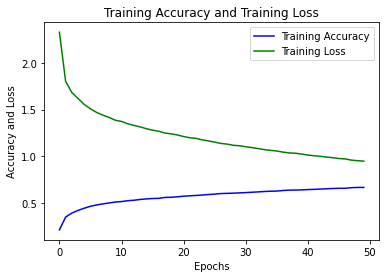

In [ ]:
plt.plot(epochs, accuracy, 'b', label = 'Training Accuracy')
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.title('Training Accuracy and Training Loss')
plt.legend()
plt.show()